In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import math
from sympy import *
#import random  # para gerar números aleatórios

<h2>4.1.1 Exemplo: movimento 1D</h2>

In [4]:
g = 9.8
t = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
y = 1.6 - 0.5*g*t**2
print(y)

[1.6   1.551 1.404 1.159 0.816 0.375]


In [5]:
np.transpose([t, y])

array([[0.   , 1.6  ],
       [0.1  , 1.551],
       [0.2  , 1.404],
       [0.3  , 1.159],
       [0.4  , 0.816],
       [0.5  , 0.375]])

In [6]:
t,x = np.loadtxt ("fallingtennisball02.d.txt",usecols=[0,1],unpack=True)

Text(0, 0.5, 'a [m/sˆ2]')

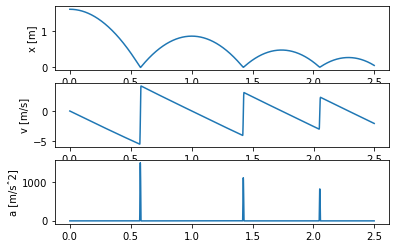

In [7]:
# para o cálculo da velocidade
n = len(x)
dt = t[1] - t[0]
v = np.zeros(n-1, float)
for i in range(n-1):
    v[i] = (x[i+1] - x[i])/dt
# o uso do n-1 se deve ao fato de não podermos calcular o último
#elemento em x[i], pois não teríamos o x[i_{ultimo}+1]

# para o cálculo da aceleração
a = np.zeros(n-1, float)
for i in range(1, n-1):
    a[i] = (v[i] - v[i-1])/dt
# mesmo caso anterior aqui do n-2 e o n-1.
# também começamos com 1, pois não teríamos o primeiro o dado v[i-1]

plt.subplot(3, 1, 1)
plt.plot(t,x)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.subplot(3, 1, 2)
plt.plot(t[0:n-1],v)
plt.ylabel('v [m/s]')
plt.subplot(3, 1, 3)
plt.plot(t[1:n-1],a[1:n-1])
plt.ylabel('a [m/sˆ2]')

<h2>Método de Euler para integração</h2>
$v(t+ \Delta t) = v(t) + a(t)\Delta t$<br>
$x(t+ \Delta t) = x(t) + v(t)\Delta t$

Text(0, 0.5, 'a [m/sˆ2]')

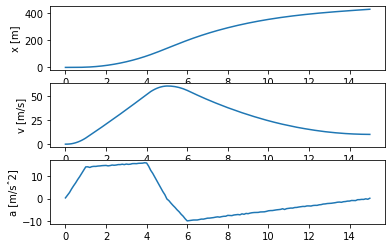

In [13]:
t, a = np.loadtxt('rocket.dat', usecols=[0,1], unpack = True)
dt = t[1] - t[0];
n = len(t);
x = np.zeros(n, float);
v = np.zeros(n, float);
x[0] = 0.0; # Valor inicial
v[0] = 0.0; # Valor inicial
for i in range(1,n):
    v[i] = v[i-1] + a[i-1]*dt;
    x[i] = x[i-1] + v[i-1]*dt;
plt.subplot(3, 1, 1)
plt.plot(t,x)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.subplot(3, 1, 2)
plt.plot(t,v)
plt.ylabel('v [m/s]')
plt.subplot(3, 1, 3)
plt.plot(t,a)
plt.ylabel('a [m/sˆ2]')

Normalmente, não temos um conjunto de medidas ou uma expressão matemática para a aceleração. Em vez disso, encontramos uma expressão para a aceleração com base em um modelo físico das forças agindo sobre um objeto, e destas forças atuantes encontramos a aceleração. Dada esta expressão para a aceleração, determinamos a velocidade e a posição do objeto. Mas isso soa exatamente como o que fizemos acima? Nós integramos a aceleração para encontrar a velocidade e, em seguida, integre novamente para encontrar a posição. Infelizmente, a integração direta só funciona se a aceleração for apenas uma função do tempo. Na maioria dos casos, não temos uma expressão da aceleração em função do tempo, mas em vez disso, sabemos como a aceleração varia com a velocidade e a posição. Por exemplo, um minúsculo grão de areia afundando na água tem uma aceleração na forma:

$\frac{d^2 x}{dt^2} = a = -a_{0} - c\cdot v$,

onde a aceleração depende da velocidade do grão de areia E uma bola suspensa em uma mola vertical tem uma aceleração:

$\frac{d^2 x}{dt^2} = a = - c\cdot x$,

que depende da posição da bola. Esses problemas não podem ser resolvidos por integração, porque a função $x(t)$ e suas derivadas ocorrem em ambos os lados da equação. Essas equações são chamadas de equações diferenciais. A solução analítica
destas equações diferenciais requerem alguma habilidade e experiência, mas, felizmente, podemos resolvê-las numericamente exatamente da mesma maneira que fizemos acima.

<h2>O método de Euler-Cromer</h2>
Utilizamos este método para resolver equações diferenciais de movimento de segunda ordem

$\frac{d^2 x}{dt^2} = a\left(t, x, \frac{d x}{dt}\right), \ v(t_{0}) = v_{0}, \ x(t_{0}) = x_{0}$,

realizamos as seguintes etapas:

$v(t_{i} + \Delta t) \approx v(t_{i}) + a(t_{i}, x(t_{i}), v(t_{i}))\Delta t$

$x(t_{i} + \Delta t) \approx x(t_{i}) + v(t_{i} + \Delta t)\Delta t$

<h2>4.2.1 Exemplo: Modelando o movimento de queda de uma bola de Tênis</h2>
<p>Neste exemplo demonstramos como calcular o movimento de queda de um bola de tenis quando dada uma expressão para a aceleração.</p>
<p>Background</p>
Na Sç. 4.1.1 nós estudamos o movimento de queda de um bola baseado nas medidas de seu movimento. Entretanto, em física nós não queremos apenas obervar o movimento, nós também queremos predizê-lo. Nós podemos primeiro analizar o movimento para encontrar as forças que agem no objeto dessas forças encontrarmos um modelo matemático da aceleração do objeto.
<p>Um modelo mais realístico</p>
Infelizmente, analizando os dados da bola de tenis, nós vemos que a aceleração da bola não é constante, nós sabemos de antemão que ela depende da velocidade também, por causa da resistência do ar, que é ignorado num modelo mais simplificado. Então a aceleração é dada por<br>
$a = -g -Dv|v|.$<br>
Com $v=v(t)$, $g=9,8m/s^2$ e $D$ depende das características da bola, para uma bola de tenis $ D=0.0245m^{-1} $. Fixando como condições iniciais $v(0)=0m/s$ e $y(0)=2.0m.$
<p>Resolvendo o modelo realístico</p>
Utilizamos o método de Euler para encontrar a posicial e velocidade por integração gradual partindo das condições iniciais. Então temos que:<br>
$v(t_i + \Delta t) = v(t_{0}) + a(t_i , v_i , y_i)\Delta t$<br>
$y(t_i + \Delta t) = y(t_{0}) + v(t_i + \Delta t)\Delta t$<br>
$a(t_i , v_i , y_i) = -g - Dv(t_i)|v(t_i)|,$<br>

In [ ]:
D = 0.0245 # mˆ-1
g = 9.8 # m/sˆ2
y0 = 2.0
v0 = 0.0

<p>Bem, precisamos dizer por quanto tempo queremos calcular o movimento. Há duas estratégias, nós podemos dar um chute inicial da duração da simulação. Primeiro fazemos uma estimativa da duração com base nos dados existentes da figura abaixo, e achamos que t = 0,5 s é um
tempo de simulação razoável:</p>
time = 0.5


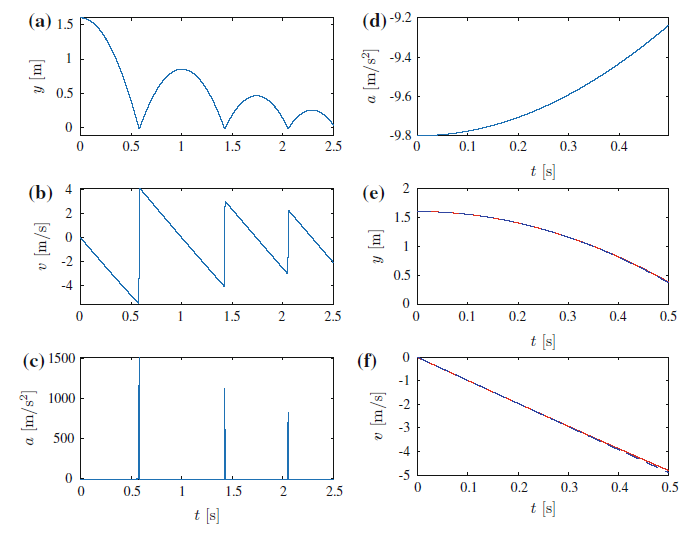

<p>Em seguida, precisamos decidir o intervalo de tempo t. Isso precisa ser pequeno o suficiente para garantir uma boa precisão do resultado, mas não muito pequena ou a simulação demora muito. Tente um valor de $ t = 0,00001 s $:</p>
$ dt = 0.00001 $
<p>Com base nisso, calculamos quantas etapas de simulação precisamos, $ n = t / \Delta t$, e geramos matrizes para as posições, velocidades, acelerações e tempo para a simulação. Todos os valores são inicialmente definidos como zero:</p>
<p>Variables</p>
n = ceil(time/dt)<br>
y = zeros(n,float)<br>
v = zeros(n,float)<br>
a = zeros(n,float)<br>
t = zeros(n,float)<br>
<p> Em seguida, definimos as condições iniciais:</p>
<p>Initialize</p>
y[0] = y0<br>
v[0] = v0<br>
<p>Antes, finalmente, as etapas de Euler-Cromer são implementadas em um loop de integração. Todo o programa é fornecido no seguinte:</p>

Text(0, 0.5, 'a [m/sˆ2]')

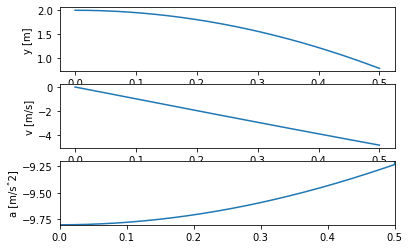

In [16]:
#Cte
D = 0.0245 # mˆ-1
g = 9.8 # m/sˆ2
y0 = 2.0
v0 = 0.0
time = 0.5
dt = 0.00001

# Variables
n = math.ceil(time/dt)
y = np.zeros(n,float)
v = np.zeros(n,float)
a = np.zeros(n,float)
t = np.zeros(n,float)

# Initialize
y[0] = y0
v[0] = v0

# Integration loop
for i in range(n-1):
    a[i] = -g -D*v[i]*abs(v[i])
    v[i+1] = v[i] + a[i]*dt
    y[i+1] = y[i] + v[i+1]*dt
    t[i+1] = t[i] + dt

# Plot
plt.subplot(3, 1, 1)
plt.plot(t,y)
plt.xlabel('t [s]')
plt.ylabel('y [m]')
plt.subplot(3, 1, 2)
plt.plot(t,v)
plt.ylabel('v [m/s]')
plt.subplot(3, 1, 3)
plt.plot(t,a)
plt.axis([0, .5, -9.8, -9.2])
plt.ylabel('a [m/sˆ2]')

<p>Agora podemos utilizar estes resultados para responder as questões quanto a dinâmica da partícula, como quando a bola atinge o solo. Poderíamos pensar em fazer</p>
if (y[i]==0.0)<br>
print t[i]<br>

<p>Mas isso não funcionará, porque $ y(t_i) $ geralmente não será zero para nenhum $ i $. Tipicamente, o programa irá passar direto por $ y = 0 $ indo de um pequeno valor positivo em algum $ t_i $ para um pequeno valor negativo em $ t_{i + 1} $. Em vez disso, devemos encontrar a primeira vez que $y(t)$ passa em $0$, isto é, devemos encontrar o primeiro $ t_{i + 1} $ quando $ y(t_{i + 1}) < 0$. Então sabemos que $ y (t) = 0 $ em algum lugar no intervalo $t_i < t < t_{i + 1} $. Podemos então estimar um valor preciso para $ t $ usando interpolação, ou podemos simplesmente usar o valor $ t_{i + 1} $, se acharmos que isso nos dará precisão suficiente. Isso é implementado na seguinte modificação do programa, onde também interrompemos o cálculo quando a bola atinge o solo:

-4.804167692535084


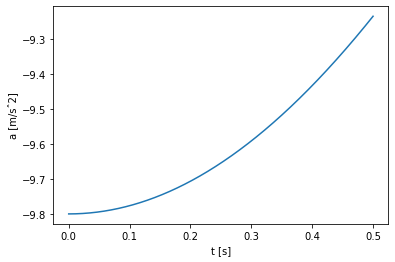

In [18]:
for i in range(n-1):
    a[i] = -g -D*v[i]*abs(v[i])
    v[i+1] = v[i] + a[i]*dt
    y[i+1] = y[i] + v[i+1]*dt
    if (y[i+1]<0):
        break
    t[i+1] = t[i] + dt
print(v[i+1])
plt.plot(t[0:i-1],a[0:i-1])
plt.xlabel('t [s]');
plt.ylabel('a [m/sˆ2]');

<p>onde usamos break para parar o loop quando a condição for atendida. Note que devemos agora plotar apenas os valores até i, porque não calculamos mais valores. Os valores de i+2 a n foram definidos como zero inicialmente para y, v e a e serão tornar  seu enredo confuso se você incluí-los. (Experimente e veja). 
</p>
<h6>Teste sua compreensão:</h6>
<p> 
    O que aconteceria se considerássemos que a bola tinha uma velocidade inicial v0 = −2vT quando começou? Esboce a posição,
    velocidade e aceleração resultantes como uma função do tempo.
</p>

<h6>Solução analítica:</h6> 
<p>
    A equação diferencial em (4.66) é uma das poucas equações que podemos resolver analiticamente desde que a velocidade não
    mude de sinal. Quando a bola é caindo, a velocidade é negativa e podemos substituir |v| por −v:
</p>
<h6>Solução simbólica: </h6> 
<p>
    A equação diferencial em (4.66) também pode ser resolvida diretamente usando o solver simbólico em Python. Podemos resolver
    a equação diferencial para velocidade, v(t):
</p> 
<p>
    $ \frac{dv}{dt} = -g + Dv^{2} = 0 $
</p>
<p>
    Primeiro definimos as variágeis $ g $ e $ D $ como variáveis simbólicas, e a função $ v(t) $ como uma função simbólica:
</p>

In [3]:
#from sympy import *
v = Function('v')
t = Symbol ('t', real = True, positive = True)
g = Symbol ('g', real = True, positive = True)
D = Symbol ('D', real = True, positive = True)
dsolve(Derivative(v(t), t) + g - D * v(t)**2, v(t))

Eq(v(t), sqrt(g)/(sqrt(D)*tanh(sqrt(D)*sqrt(g)*(C1 - t))))

Podemos então encontrar a posição por integração simbólica desta equação:

In [5]:
integrate(-(sqrt(g)*tanh(sqrt(D*g)*t))/sqrt(D), t)

-sqrt(g)*(t - log(tanh(sqrt(D)*sqrt(g)*t) + 1)/(sqrt(D)*sqrt(g)))/sqrt(D)

<h2>Exercícios: </h2>

<h3>4.12 Capturando o movimento de uma bola caindo. </h3>
<p>
    Usamos um detector de movimento ultrassônico para medir a posição vertical de uma pequena bola. Lançamos a bola para cima e
    meça a posição até atingir o solo. Você encontra os dados medidos no arquivo ballmotion.d.7 Cada linha no arquivo consiste
    em um tempo, $ t_{i} $ , medido em segundos, e um
    distância, $ x_{i} $, medida em metros.
</p>
<p>
(a) Plote a posição em função do tempo para a bola.<br>
(b) Quanto tempo leva até a bola atingir o solo?<br>
(c) Plote a velocidade média em função do tempo para a bola.<br>
(d) Qual é a velocidade máxima e mínima da bola?<br>
(e) Qual é a velocidade inicial: A velocidade da bola no início do movimento?<br>
(f) Plote a aceleração média em função do tempo para a bola.<br>
(g) Quando são as acelerações máxima e mínima? Isso corresponde com sua intuição física?<br>
</p>

In [6]:
t,x = np.loadtxt ("ballmotion.d7.txt",usecols=[0,1],unpack=True)

Text(0, 0.5, 'x [m]')

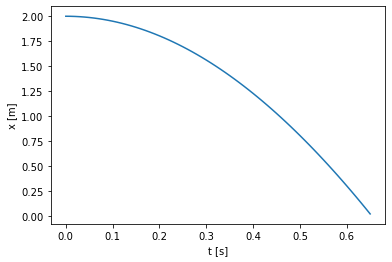

In [7]:
plt.plot(t,x)
plt.xlabel('t [s]')
plt.ylabel('x [m]')

In [ ]:
pág 74